In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nslkdd/KDDTest+.arff
/kaggle/input/nslkdd/KDDTest-21.arff
/kaggle/input/nslkdd/KDDTest1.jpg
/kaggle/input/nslkdd/KDDTrain+.txt
/kaggle/input/nslkdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/KDDTest-21.txt
/kaggle/input/nslkdd/KDDTest+.txt
/kaggle/input/nslkdd/KDDTrain+.arff
/kaggle/input/nslkdd/index.html
/kaggle/input/nslkdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/KDDTrain1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.arff
/kaggle/input/nslkdd/nsl-kdd/index.html
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTrain1.jpg


In [2]:
from tensorflow.keras.utils import get_file
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

In [3]:

# try:
#     path = get_file('NSL-KDD.zip', origin=\
#                   'http://205.174.165.80/CICDataset/NSL-KDD/Dataset/NSL-KDD.zip')
#     print(path)
# except:
#     print("Error downloading")

In [4]:
filespath = "/kaggle/input/nslkdd/"
df_train = pd.read_csv(filepath_or_buffer=filespath+'KDDTrain+.txt',delimiter=',', header=None)
df_test = pd.read_csv(filepath_or_buffer=filespath+'KDDTest+.txt',delimiter=',', header=None)

In [5]:
# The CSV file has no column heads, so add them
df_train.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome',
    'difficulty'
]
df_test.columns = df_train.columns
print(f"df_train.shape = {df_train.shape}")
print(f"df_test.shape = {df_test.shape}")

df_train.shape = (125973, 43)
df_test.shape = (22544, 43)


In [6]:
class_DoS = ['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod', 
             'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm']
class_Probe = ['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan']

class_U2R = ['buffer_overflow', 'loadmodule', 'perl', 'ps', 'rootkit', 'sqlattack', 'xterm']

class_R2L = ['ftp_write', 'guess_passwd', 'httptunnel',  'imap', 'multihop', 'named', 
             'phf', 'sendmail', 'snmpgetattack', 'spy', 'snmpguess', 'warezclient', 
             'warezmaster', 'xlock', 'xsnoop']

In [7]:
df_train['class'] = df_train['outcome']
df_train['class'].replace(class_DoS, value='DoS', inplace=True)
df_train['class'].replace(class_Probe, value='Probe',inplace=True)
df_train['class'].replace(class_U2R, value='U2R',inplace=True)
df_train['class'].replace(class_R2L, value='R2L', inplace=True)
print(df_train['class'].unique())

labels={"normal": 0, "DoS": 1, "Probe": 2, "U2R": 3, "R2L":4}
df_train['label'] = df_train['class'].replace(labels)
df_train['label'].nunique()

['normal' 'DoS' 'R2L' 'Probe' 'U2R']


5

In [8]:
df_test['class'] = df_test['outcome']
df_test['class'].replace(class_DoS, value='DoS', inplace=True)
df_test['class'].replace(class_Probe, value='Probe',inplace=True)
df_test['class'].replace(class_U2R, value='U2R',inplace=True)
df_test['class'].replace(class_R2L, value='R2L', inplace=True)
print(df_test['class'].unique())
df_test['label'] = df_test['class'].replace(labels)
df_test['label'].nunique()

['DoS' 'normal' 'Probe' 'R2L' 'U2R']


5

U2R          52
DoS       45927
R2L         995
normal    67343
Probe     11656
Name: class, dtype: int64


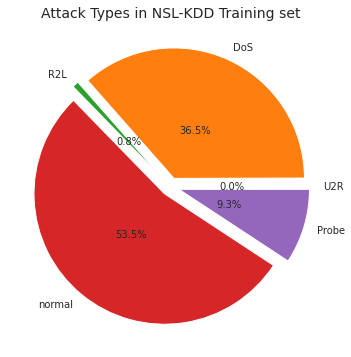

In [9]:
pie, ax = plt.subplots(figsize=[10,6])
class_data = df_train['class'].value_counts().sample(frac=1.0)
print(class_data)

ax.pie(x=class_data, labels=class_data.keys(), explode=[0.07]*5, pctdistance=0.4, autopct="%.1f%%")
ax.set_title("Attack Types in NSL-KDD Training set", fontdict={'fontsize': 14})
plt.show()

# Data Preprocessing

In [10]:
df_train_obj = df_train.iloc[:, :-4].select_dtypes(include='object')
df_train_num = df_train.iloc[:, :-4].select_dtypes(exclude='object')
df_test_obj = df_test.iloc[:, :-4].select_dtypes(include='object')
df_test_num = df_test.iloc[:, :-4].select_dtypes(exclude='object')

print(f"shape of numeric features: {df_train_num.shape}")
print(f"shape of object features: {df_train_obj.shape}")
print(f"shape of numeric features: {df_test_num.shape}")
print(f"shape of object features: {df_test_obj.shape}")

shape of numeric features: (125973, 38)
shape of object features: (125973, 3)
shape of numeric features: (22544, 38)
shape of object features: (22544, 3)


## data normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
# df_train_obj = df_train.iloc[:,:-3]
df_train_enc = enc.fit_transform(df_train_obj).toarray()
train_enc_features = enc.get_feature_names(input_features=df_train_obj.columns)
df_test_enc = enc.transform(df_test_obj).toarray()
test_enc_features = enc.get_feature_names(input_features=df_test_obj.columns)
# print(len(train_enc_features), len(test_enc_features))
X_train_enc = np.c_[df_train_num, df_train_enc]
X_test_enc = np.c_[df_test_num, df_test_enc]


scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train_enc)
X_test_scaler = scaler.transform(X_test_enc)
y_train = df_train['label']
y_test = df_test['label']
print(f"X_train shape: {X_train_scaler.shape}")
print(f"X_test shape: {X_test_scaler.shape}")
print("numerical labels: y_train, y_test")
# X_train_normal = X_train_scaler[df_train['class']=='normal']
# X_train_DoS = X_train_scaler[df_train['class']=='DoS']
# X_train_Probe = X_train_scaler[df_train['class']=='Probe']
# X_train_U2R = X_train_scaler[df_train['class']=='U2R']
# X_train_R2L = X_train_scaler[df_train['class']=='R2L']

# X_test_normal = X_test_scaler[df_test['class']=='normal']
# X_test_DoS = X_test_scaler[df_test['class']=='DoS']
# X_test_Probe = X_test_scaler[df_test['class']=='Probe']
# X_test_U2R = X_test_scaler[df_test['class']=='U2R']
# X_test_R2L = X_test_scaler[df_test['class']=='R2L']
# X_train_bagan = X_train_scaler[df_train['class']!='normal']
# y_train_bagan = y_train[df_train['class']!='normal']
# y_train_bagan.reset_index(drop=True, inplace=True)
# print(f"X_train_bagan shape: {X_train_bagan.shape}")
X_train = X_train_scaler

X_train shape: (125973, 122)
X_test shape: (22544, 122)
numerical labels: y_train, y_test


# BAGAN Model 

In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import get_file
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import GaussianNoise, Add
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from tensorflow.keras.models import load_model
from collections import Counter

optimizer = Adam(0.001, 0.5)
instance_shape = 122
latent_dim = 10
# n_classes = 4

In [13]:
### hyper-parameters ###
latend_dim = 10 ## constant
input_dim = X_train.shape[1] # 122
batch_size = 64

### encoder ###
'''noise is added as inputlayer, not through a GaussianNoise layer.
In this way, even the same original input will product different noisy Input. 
GaussianNoise is fixed to generate the same result from the same input.
'''
encoder = Sequential(name='model')
encoder.add(Input(shape=(input_dim,), name="original_input"))
# encoder.add(GaussianNoise(0.2))
encoder.add(Dense(32, activation='relu', input_shape=(input_dim, )))
encoder.add(Dense(latend_dim, activation='relu'))


### decoder ###
decoder = Sequential(name='decoder')
decoder.add(Input(shape=(latend_dim,), name="deconder_input"))
decoder.add(Dense(32, activation='relu'))
decoder.add(Dense(input_dim, activation='sigmoid'))

### autoencoder ###
autoencoder = Sequential([
    encoder, 
    decoder
])

autoencoder.compile(loss='mse', optimizer='Adam')
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Sequential)           (None, 10)                4266      
_________________________________________________________________
decoder (Sequential)         (None, 122)               4378      
Total params: 8,644
Trainable params: 8,644
Non-trainable params: 0
_________________________________________________________________



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [14]:
history = autoencoder.fit(X_train, X_train, 
                          batch_size=batch_size, epochs=20, validation_split=0.2)

2021-11-03 12:42:13.289377: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1575/1575 [==============================] - 5s 3ms/step - loss: 0.0164 - val_loss: 0.0040
Epoch 2/20
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 3/20
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 4/20
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 5/20
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 6/20
1575/1575 [==============================] - 5s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/20
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/20
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/20
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/20
1575/1575 [==============================] - 4s 3ms/step - loss: 0.001

In [15]:
# '''
# generate noisy samples by adding guassian noise to original samples
# '''
# def noisyInput(X):
# #     noise = np.random.normal(loc=0.0, scale=1.0, size=X.shape)
# #     noisy_input = np.add(X, noise)
#     noise_factor = 0.4
#     noisy_input = X + noise_factor * np.random.normal(
#         loc=0.0, scale=1.0, size=X.shape
#     )
#     return np.clip(noisy_input, 0.0, 1.0)

# ae_noisy_input = noisyInput(X_train_bagan)
# history = autoencoder.fit(ae_noisy_input, X_train_bagan, 
#                           batch_size=batch_size, epochs=20, validation_split=0.2)

In [16]:
encoder.save('pre-train-encoder')
decoder.save('pre-train-decoder')

2021-11-03 12:43:41.624052: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


### Build Discriminator

In [17]:

optimizer = Adam(0.002, 0.5)
# labels_attacks = {'DoS': 1, 'Probe': 2, 'U2R': 3, 'R2L': 4}
# nclasses = len(labels_attacks)
nclasses = len(labels)

# transfer encoder to discriminator
def build_discriminator(nclasses):
    interim_encoder = load_model('pre-train-encoder')
    d_input = Input(shape=(input_dim, ))
    features = interim_encoder(d_input)
    aux = Dense(
        nclasses+1, activation='softmax', name='auxiliary')(features)
    discriminator = Model(d_input, aux, name='discriminator')
    return discriminator

discriminator = build_discriminator(nclasses)
discriminator.compile(loss=['sparse_categorical_crossentropy'], optimizer=optimizer, metrics=['accuracy'])
discriminator.summary()


Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 122)]             0         
_________________________________________________________________
model (Sequential)           (None, 10)                4266      
_________________________________________________________________
auxiliary (Dense)            (None, 6)                 66        
Total params: 4,332
Trainable params: 4,332
Non-trainable params: 0
_________________________________________________________________


### Build Generator

In [18]:
def build_generator():
    interim_decoder = load_model('pre-train-decoder')
    g_input = Input(shape=(latend_dim, ))
    features = interim_decoder(g_input)
    generator = Model(g_input, features, name='generator')
    return generator
generator = build_generator()
generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
decoder (Sequential)         (None, 122)               4378      
Total params: 4,378
Trainable params: 4,378
Non-trainable params: 0
_________________________________________________________________


In [19]:
import tensorflow as tf
tf.__version__

'2.6.0'

### Build BAGAN

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
noise (InputLayer)           [(None, 10)]              0         
_________________________________________________________________
generator (Functional)       (None, 122)               4378      
_________________________________________________________________
discriminator (Functional)   (None, 6)                 4332      
Total params: 8,710
Trainable params: 4,378
Non-trainable params: 4,332
_________________________________________________________________


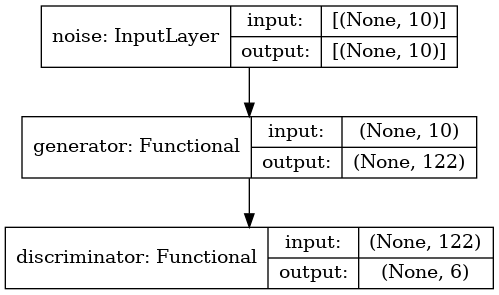

In [20]:
def build_bagan():
    discriminator.trainable = False
    noise = Input(shape=(latend_dim,), name='noise')
    img_ = generator(noise)
    valid = discriminator(img_)
    bagan = Model(noise, valid)
    return bagan

bagan = build_bagan()
bagan.compile(loss=['sparse_categorical_crossentropy'], optimizer=optimizer)
bagan.summary() 
plot_model(bagan, to_file='bagan.png', show_shapes=True)

In [21]:
rng = np.random.default_rng()
def multivariate(X, size=64):
    '''Draw random vectors from a multivariate normal distribution 
    with diagonal covariance approximations.
    Diagonal covariance (`cov` has non-negative elements, and only on the diagonal)
    Assumption: all the features in latent space are independent from each other.
    '''
    u = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    diag = np.diag(std)
    multiV = rng.multivariate_normal(u, diag, size)
    return multiV

def latentGenerator(encoder, X_train):
    return encoder.predict(X_train)

def latentSampling(vectors, y_train, labels_dict, size=64):
    ''' Draw ramdom vectors at latent space from a multivariate normal distribution 
    with a given label
    '''
    empty_X = np.empty(shape=(1, vectors.shape[1]))
    if y_train.ndim == 1:
        empty_y = np.empty(shape=(1,))
        shape = (size, )
    else:
        empty_y = np.empty(shape=(1,1))
        shape = (size, 1)
    
    
    for label in labels_dict.values():
        vector = vectors[y_train == label]
        sample = multivariate(vector, size=size)
        y = np.zeros(shape=shape)
        y.fill(label)

        empty_X = np.r_[empty_X, sample] 
        empty_y = np.r_[empty_y, y]
        
    empty_X = empty_X[1:]
    empty_y = empty_y[1:] 
    index = np.random.choice(empty_X.shape[0], size=size, replace=False)
    X_samples = empty_X[index]
    y_samples = empty_y[index]
    
    return X_samples, y_samples

In [22]:
# def initSampling(X, y, nsize, labels):
#     X = np.array(X)
#     y = np.array(y)
#     x_0 = X[0:1]
#     y_0 = y[0:1]

#     for i in labels.values():
#         X_index = X[y == i]
#         y_index = y[y == i]
#         idx = np.random.randint(0, X_index.shape[0], round(nsize/len(labels)))
#         x_0 = np.r_[x_0, X_index[idx]] 
#         y_0 = np.r_[y_0, y_index[idx]]

#     X_samples = x_0[1:]
#     y_samples = y_0[1:]
#     return X_samples, y_samples

In [23]:
from sklearn.utils import shuffle
conditional_size = round(batch_size / (nclasses + 1))
print(conditional_size)
latents = latentGenerator(encoder, X_train)
# labels_list = labels.values()

g_loss_list = []
d_loss_list = []
epochs = 2000

for epoch in range(epochs):
    # ---------------------
    #  Train Discriminator
    # ---------------------
    # Sample noise as generator input, generate fake labels (0) for all the synthetic samples
    gen_samples, gen_labels = latentSampling(latents, y_train, labels, conditional_size)
    gen_samples = generator.predict(gen_samples)
    gen_labels = np.zeros_like(gen_labels)
    #Select a random batch of real samples  
    idx = np.random.randint(0, X_train_scaler.shape[0], (batch_size - conditional_size))                
    img = X_train_scaler[idx]
    label_r = y_train[idx].values
                            
    # concatenate and shuffle all the real and fake samples
    total_samples = np.r_[gen_samples, img]
    total_labels = np.r_[gen_labels, label_r]
    total_samples, total_labels = shuffle(total_samples, total_labels, random_state=42)
                            
    d_loss = discriminator.train_on_batch(total_samples, total_labels)                        
    
    # ---------------------
    #  Train Generator
    # ---------------------
    # Sample noise from multivariate normal distribution as generator input
    noises, noisy_labels = latentSampling(latents, y_train, labels, batch_size)
    # training the Generator with the real labels
    g_loss = bagan.train_on_batch(noises, noisy_labels)             
    
    d_loss_list.append(d_loss[0])
    g_loss_list.append(g_loss)
    
    if epoch % 50 == 0:
        # Plot the progress
        print (f"{epoch} dloss:{d_loss[0]:.4f}, acc: {100*d_loss[1]:.2f}, gloss: {g_loss:.4f}")
    

11
0 dloss:16.4795, acc: 9.38, gloss: 9.2719
50 dloss:1.2732, acc: 62.50, gloss: 0.5459
100 dloss:0.3874, acc: 85.94, gloss: 1.2214
150 dloss:0.7447, acc: 87.50, gloss: 2.0382
200 dloss:0.4765, acc: 89.06, gloss: 1.7328
250 dloss:0.4164, acc: 92.19, gloss: 1.2746
300 dloss:0.1228, acc: 95.31, gloss: 2.0770
350 dloss:0.1018, acc: 96.88, gloss: 2.9048
400 dloss:0.2351, acc: 90.62, gloss: 1.7678
450 dloss:0.1698, acc: 98.44, gloss: 1.9301
500 dloss:0.1477, acc: 95.31, gloss: 1.9406
550 dloss:0.1026, acc: 98.44, gloss: 2.5953
600 dloss:0.0919, acc: 95.31, gloss: 2.9231
650 dloss:0.0668, acc: 98.44, gloss: 2.4743
700 dloss:0.0461, acc: 100.00, gloss: 3.6219
750 dloss:0.0544, acc: 96.88, gloss: 3.5204
800 dloss:0.0210, acc: 100.00, gloss: 3.4412
850 dloss:0.0305, acc: 100.00, gloss: 4.0394
900 dloss:0.0752, acc: 98.44, gloss: 4.3135
950 dloss:0.2404, acc: 84.38, gloss: 1.7298
1000 dloss:0.1264, acc: 93.75, gloss: 2.0983
1050 dloss:0.2314, acc: 93.75, gloss: 1.9470
1100 dloss:0.1586, acc: 95.

In [24]:
def loss_plot(losses, names):
    length = len(names)
    fig, ax = plt.subplots(figsize=(8,6))
    for loss, name in zip(losses, names):
        ax.plot(loss, label=name)
    ax.set_ylabel("loss")
    ax.set_xlabel("Iterations")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend()
    plt.show()

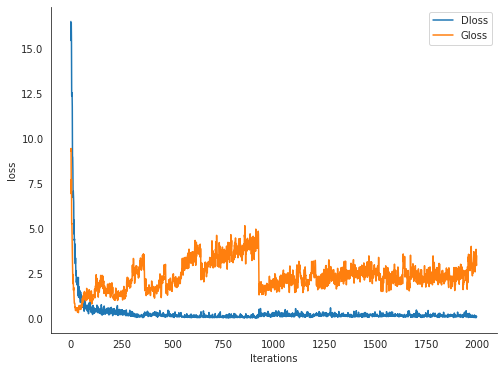

In [25]:
names = ['Dloss', 'Gloss']
losses = [d_loss_list, g_loss_list]
loss_plot(losses, names)

In [26]:
sampling_size = 150000
sampling_labels = {'Probe': 2, 'U2R': 3, 'R2L': 4}
X_generated, y_generated = latentSampling(latents, y_train, sampling_labels, sampling_size)
X_generated = generator.predict(X_generated)
X_all = np.r_[X_train, X_generated]
y_all = np.r_[y_train, y_generated]
X_all, y_all = shuffle(X_all, y_all, random_state=42)

In [27]:
from collections import Counter
Counter(y_generated)
Counter(y_all)

Counter({3.0: 49971, 1.0: 45927, 2.0: 61914, 4.0: 50818, 0.0: 67343})

### Performance

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 4), round(precision,4), \
                                     round(recall, 4), round(f1_score,4)]
        
    return df_performance

def plot_cm(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(10, 10))
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(ax=ax)
    plt.show()

### Supervisized Learning Performance

In [29]:
def sl_predict(X_train, y_train, X_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred, model

(22544,)
              precision    recall  f1-score   support

      normal       0.69      0.92      0.79      9711
         DoS       0.96      0.81      0.88      7460
       Probe       0.60      0.76      0.67      2421
         U2R       0.37      0.10      0.16        67
         R2L       0.95      0.11      0.20      2885

    accuracy                           0.76     22544
   macro avg       0.71      0.54      0.54     22544
weighted avg       0.80      0.76      0.73     22544



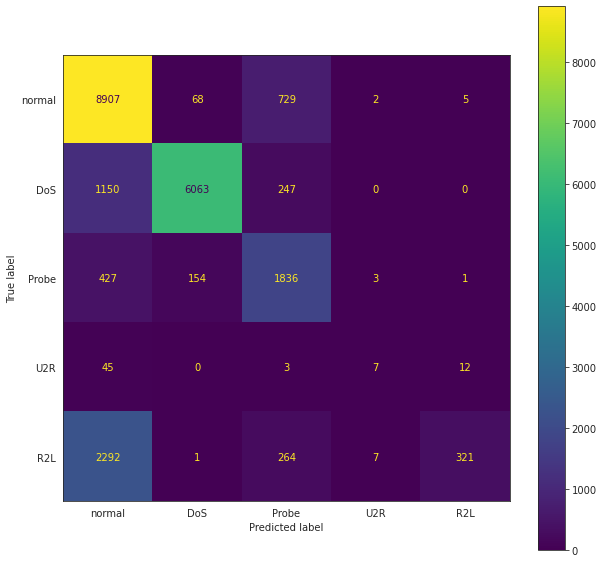

,accuracy,precision,recall,f1_score
normal,0.7907,0.6947,0.9172,0.7906
DoS,0.9281,0.9645,0.8127,0.8821
Probe,0.9189,0.5963,0.7584,0.6676
U2R,0.9968,0.3684,0.1045,0.1628
R2L,0.8855,0.9469,0.1113,0.1991


In [30]:
clf = DecisionTreeClassifier(random_state=0)
y_pred, dt = sl_predict(X_all, y_all, X_test_scaler, clf)
print(y_pred.shape)

print(classification_report(y_test, y_pred, target_names=list(labels.keys())))
plot_cm(y_test, y_pred, labels=list(labels.keys()))

performance = multilabel_matrix(y_test, y_pred, labels=list(labels.keys()))
performance

(22544,)
              precision    recall  f1-score   support

      normal       0.65      0.97      0.78      9711
         DoS       0.96      0.81      0.88      7460
       Probe       0.84      0.61      0.71      2421
         U2R       0.40      0.03      0.06        67
         R2L       0.97      0.04      0.08      2885

    accuracy                           0.76     22544
   macro avg       0.77      0.49      0.50     22544
weighted avg       0.82      0.76      0.71     22544



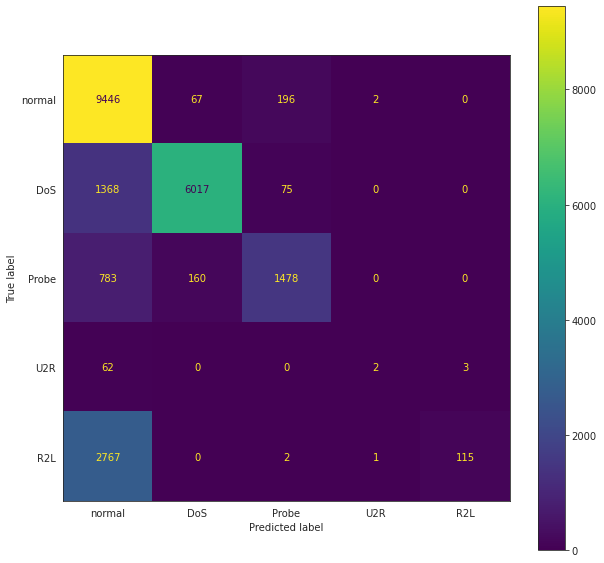

,accuracy,precision,recall,f1_score
normal,0.7673,0.6548,0.9727,0.7827
DoS,0.9259,0.9636,0.8066,0.8781
Probe,0.9461,0.8441,0.6105,0.7085
U2R,0.997,0.4,0.0299,0.0556
R2L,0.877,0.9746,0.0399,0.0766


In [31]:
clf = RandomForestClassifier(random_state=0)
y_pred, rf = sl_predict(X_all, y_all, X_test_scaler, clf)
print(y_pred.shape)

print(classification_report(y_test, y_pred, target_names=list(labels.keys())))
plot_cm(y_test, y_pred, labels)

performance = multilabel_matrix(y_test, y_pred, labels)
performance

(22544,)
              precision    recall  f1-score   support

      normal       0.53      0.97      0.68      9711
         DoS       0.85      0.41      0.55      7460
       Probe       0.86      0.10      0.18      2421
         U2R       0.00      0.00      0.00        67
         R2L       0.72      0.20      0.31      2885

    accuracy                           0.59     22544
   macro avg       0.59      0.33      0.34     22544
weighted avg       0.69      0.59      0.54     22544



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


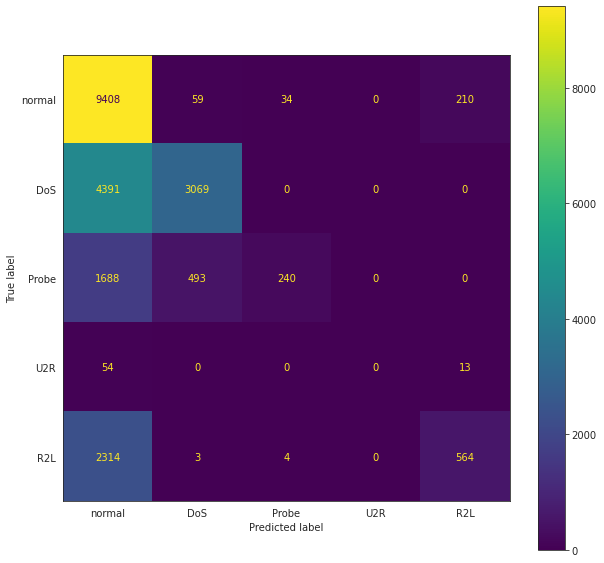

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


,accuracy,precision,recall,f1_score
normal,0.6119,0.5269,0.9688,0.6826
DoS,0.7806,0.8469,0.4114,0.5538
Probe,0.9016,0.8633,0.0991,0.1778
U2R,0.997,NaN,0.0,NaN
R2L,0.8872,0.7166,0.1955,0.3072


In [32]:
clf = GaussianNB()
y_pred, gnb = sl_predict(X_all, y_all, X_test_scaler, clf)
print(y_pred.shape)

print(classification_report(y_test, y_pred, target_names=list(labels.keys())))
plot_cm(y_test, y_pred, labels)

performance = multilabel_matrix(y_test, y_pred, labels)
performance

In [33]:
# clf = SVC(kernel='linear')

# y_pred, svc = sl_predict(X_all, y_all, X_test_scaler, clf)
# print(y_pred.shape)

# print(classification_report(y_test, y_pred, target_names=list(labels.keys())))
# plot_cm(y_test, y_pred, labels)

# performance = multilabel_matrix(y_test, y_pred, labels)
# performance